In [153]:
import numpy as np
import pandas as pd

# Знакомство с данными

In [155]:
report = pd.read_csv('D:/Книги/Программирование/ML_contests/Data_Fusion_Contest_2024_task2/report_dates.csv')
report

,report,report_dt
0,1,2022-07-31 03:00:00
1,2,2022-08-31 03:00:00
2,3,2022-09-30 03:00:00
3,4,2022-10-31 03:00:00
4,5,2022-11-30 03:00:00
5,6,2022-12-31 03:00:00
6,7,2023-01-31 03:00:00
7,8,2023-02-28 03:00:00
8,9,2023-03-31 03:00:00
9,10,2023-04-30 03:00:00


In [156]:
clients = pd.read_csv('D:/Книги/Программирование/ML_contests/Data_Fusion_Contest_2024_task2/clients.csv')
clients

,user_id,report,employee_count_nm,bankemplstatus,customer_age
0,3,2,ОТ 101 ДО 500,0,3
1,9,1,БОЛЕЕ 1001,0,3
2,13,6,ОТ 501 ДО 1000,0,2
3,37,5,БОЛЕЕ 1001,0,2
4,41,1,ОТ 101 ДО 500,0,2
...,...,...,...,...,...
95995,562043,12,NaN,0,2
95996,562205,12,NaN,0,1
95997,562312,12,NaN,0,0
95998,562721,12,NaN,0,2


In [157]:
clients['bankemplstatus'].sum()  # можно пренебречь

313

In [158]:
train = pd.read_csv('D:/Книги/Программирование/ML_contests/Data_Fusion_Contest_2024_task2/train.csv')
train

,user_id,target,time
0,3,0,77
1,13,0,86
2,37,0,89
3,41,0,57
4,42,0,84
...,...,...,...
63995,561824,0,91
63996,562043,0,75
63997,562312,0,91
63998,562721,0,29


In [332]:
transactions = pd.read_csv('D:/Книги/Программирование/ML_contests/Data_Fusion_Contest_2024_task2/transactions.csv')
transactions

,user_id,mcc_code,currency_rk,transaction_amt,transaction_dttm
0,3,3,1,-183.883957,2022-01-28 12:05:33
1,3,3,1,-3206.437012,2022-01-28 12:52:30
2,3,16,1,-153866.890625,2022-02-16 14:45:56
3,3,56,1,-15144.601562,2022-03-09 19:58:29
4,3,0,1,5297.908691,2022-03-12 18:11:31
...,...,...,...,...,...
13075018,562740,155,1,-2484.366211,2023-03-20 11:52:09
13075019,562740,9,1,-187.658463,2023-03-20 12:10:22
13075020,562740,1,1,-891.933350,2023-03-20 15:53:37
13075021,562740,13,1,-464.467316,2023-03-20 15:54:49


In [161]:
# "Ушедшие" клиенты
train_target_1 = train.loc[train['target'] == 1]
train_target_1

,user_id,target,time
18,100,1,41
30,183,1,5
31,193,1,59
34,208,1,39
42,266,1,18
...,...,...,...
63973,559219,1,20
63976,559417,1,41
63986,560533,1,50
63987,560708,1,51


In [162]:
train_target_1_ids = train_target_1['user_id']
train_target_1_ids[:15]

18      100
30      183
31      193
34      208
42      266
56      365
130     984
175    1334
181    1402
197    1521
258    2140
339    2767
386    3269
393    3328
398    3378
Name: user_id, dtype: int64

In [163]:
# "Выжившие" или цензурированные клиенты
train_target_0 = train.loc[train['target'] == 0]
train_target_0

,user_id,target,time
0,3,0,77
1,13,0,86
2,37,0,89
3,41,0,57
4,42,0,84
...,...,...,...
63995,561824,0,91
63996,562043,0,75
63997,562312,0,91
63998,562721,0,29


In [164]:
train_target_0_ids = train_target_0['user_id']
train_target_0_ids[:15]

0      3
1     13
2     37
3     41
4     42
5     46
6     49
7     50
8     65
9     66
10    68
11    70
12    76
13    77
14    81
Name: user_id, dtype: int64

In [165]:
# user_id=100, данные в клиентах
user_id_100 = clients.loc[clients['user_id'] == 100].copy()
user_id_100 = user_id_100.merge(report, on='report')
user_id_100

,user_id,report,employee_count_nm,bankemplstatus,customer_age,report_dt
0,100,11,БОЛЕЕ 1001,0,3,2023-05-31 03:00:00


In [166]:
# транзакции клиента по id
transactions.loc[transactions['user_id'] == 100]

,user_id,mcc_code,currency_rk,transaction_amt,transaction_dttm
3855,100,0,1,86.123459,2022-08-27 09:25:22
3856,100,0,1,88.637466,2022-08-27 10:07:12
3857,100,3,1,-94.843559,2022-09-09 13:21:50
3858,100,0,1,105.806625,2022-09-09 13:24:13
3859,100,3,1,-92.507896,2022-09-09 14:16:31
3860,100,0,1,106.332329,2022-09-09 14:55:40
3861,100,0,1,90.729172,2022-09-19 09:50:48
3862,100,0,1,-995.125610,2022-09-27 17:15:00
3863,100,0,1,-2119.127686,2022-09-27 20:04:23
3864,100,0,1,-207.272049,2022-09-28 10:03:00


In [167]:
# баланс
transactions.loc[transactions['user_id'] == 100, 'transaction_amt'].sum()

-43989.76210021973

In [168]:
# транзакции клиента с наименьшим ID
transactions.loc[transactions['user_id'] == 3]

,user_id,mcc_code,currency_rk,transaction_amt,transaction_dttm
0,3,3,1,-183.883957,2022-01-28 12:05:33
1,3,3,1,-3206.437012,2022-01-28 12:52:30
2,3,16,1,-153866.890625,2022-02-16 14:45:56
3,3,56,1,-15144.601562,2022-03-09 19:58:29
4,3,0,1,5297.908691,2022-03-12 18:11:31
5,3,0,1,534.363098,2022-04-11 20:48:26
6,3,0,1,4549.455078,2022-04-11 20:53:35
7,3,0,1,37991.929688,2022-04-29 18:42:58
8,3,0,1,28335.613281,2022-05-05 20:32:38
9,3,0,1,5386.999023,2022-05-14 20:14:31


In [169]:
transactions.loc[transactions['user_id'] == 3, 'transaction_amt'].sum()

13706.416641235352

In [323]:
# транзакции следующего клиента
transactions.loc[transactions['user_id'] == 13]

,user_id,mcc_code,currency_rk,transaction_amt,transaction_dttm
101,13,3,1,-19224.679688,2022-03-23 12:12:40
102,13,3,0,10772.799805,2022-04-01 20:02:35
103,13,3,1,-17878.054688,2022-04-02 13:39:47
104,13,12,1,-10775.713867,2022-04-15 03:55:39
105,13,3,1,-24370.283203,2022-04-24 14:29:32
106,13,3,1,4635.229492,2022-05-02 16:43:38
107,13,3,1,5402.959473,2022-05-02 18:21:40
108,13,12,1,-9258.000000,2022-05-15 07:12:37
109,13,3,1,-24650.388672,2022-05-31 08:43:56
110,13,7,1,-5997.509766,2022-06-09 02:44:00


In [171]:
transactions.loc[transactions['user_id'] == 13, 'transaction_amt'].sum()

-124717.37915039062

In [172]:
transactions_target_1 = transactions[transactions['user_id'].isin(train_target_1_ids)]
transactions_target_1

,user_id,mcc_code,currency_rk,transaction_amt,transaction_dttm
3855,100,0,1,86.123459,2022-08-27 09:25:22
3856,100,0,1,88.637466,2022-08-27 10:07:12
3857,100,3,1,-94.843559,2022-09-09 13:21:50
3858,100,0,1,105.806625,2022-09-09 13:24:13
3859,100,3,1,-92.507896,2022-09-09 14:16:31
...,...,...,...,...,...
13072820,561018,0,1,-114.378334,2023-03-14 11:53:35
13072821,561018,0,1,-25.323030,2023-03-14 12:53:23
13072822,561018,155,1,-91.398109,2023-03-14 14:03:50
13072823,561018,155,1,-828.499390,2023-03-19 21:24:10


In [173]:
transactions_target_0 = transactions[transactions['user_id'].isin(train_target_0_ids)]
transactions_target_0

,user_id,mcc_code,currency_rk,transaction_amt,transaction_dttm
0,3,3,1,-183.883957,2022-01-28 12:05:33
1,3,3,1,-3206.437012,2022-01-28 12:52:30
2,3,16,1,-153866.890625,2022-02-16 14:45:56
3,3,56,1,-15144.601562,2022-03-09 19:58:29
4,3,0,1,5297.908691,2022-03-12 18:11:31
...,...,...,...,...,...
13075018,562740,155,1,-2484.366211,2023-03-20 11:52:09
13075019,562740,9,1,-187.658463,2023-03-20 12:10:22
13075020,562740,1,1,-891.933350,2023-03-20 15:53:37
13075021,562740,13,1,-464.467316,2023-03-20 15:54:49


In [174]:
marked_1_share = 5417/(58583+5417)
marked_1_share

0.084640625

In [175]:
trans_marked_1_share = 644155/(8094797+644155)
trans_marked_1_share
# Клиенты "стухли", количество их транзакций снизилось перед уходом
# Значит, общее количество надо принять как переменную

0.07371078362714431

In [176]:
transactions_target_0['transaction_amt'].sum()

-8371985775.220356

In [177]:
transactions_target_1['transaction_amt'].sum()

-531843781.9937339

In [178]:
# не совсем понятно по сумме транзакций, сделаю среднее и медиану по всему датасету
transactions_target_0['transaction_amt'].mean()

-1034.242832182247

In [179]:
transactions_target_0['transaction_amt'].median()

-323.156280517578

In [180]:
transactions_target_1['transaction_amt'].mean()

-825.645662913016

In [181]:
transactions_target_1['transaction_amt'].median()

-223.588317871094

In [182]:
# посмотрим теперь, какая среднияя величина транзакций для каждого пользователя
mean_transaction_amt_per_user_target_1 = transactions_target_1.groupby('user_id')['transaction_amt'].mean()
mean_transaction_amt_per_user_target_1

user_id
100        -879.795242
183       13433.897688
193         524.757371
208       -5073.127667
266        -278.303825
              ...     
559219      -68.630240
559417     -168.092072
560533     -347.482561
560708       -3.794511
561018     -228.409278
Name: transaction_amt, Length: 5417, dtype: float64

In [183]:
mean_transaction_amt_per_user_target_1.mean()

-1227.0400887014555

In [184]:
mean_transaction_amt_per_user_target_1.median()

-420.90719451904295

In [185]:
# я никогда не отключаю паранойю
a = transactions.loc[transactions['user_id'] == 100]
a["transaction_amt"].mean()

-879.7952420043945

In [186]:
a["transaction_amt"].sum()

-43989.76210021973

In [187]:
# выше был "отток", теперь - "не_отток"
mean_transaction_amt_per_user_target_0 = transactions_target_0.groupby('user_id')['transaction_amt'].mean()
mean_transaction_amt_per_user_target_0

user_id
3         1246.037876
13       -5668.971780
37       -1053.522538
41       -6786.663385
42         193.721817
             ...     
561824    -504.927428
562043    -799.493409
562312    -331.032523
562721   -1929.467785
562740    -279.262043
Name: transaction_amt, Length: 58583, dtype: float64

In [188]:
mean_transaction_amt_per_user_target_0.mean()

-1542.0445823967839

In [189]:
# медиана отличается сильнее, чем среднее.
# Видимо, в "отток" чаще уходят люди победнее
mean_transaction_amt_per_user_target_0.median()

-740.5725565632496

In [190]:
avg_transactions_user_target_1 = transactions_target_1.groupby('user_id').size()
avg_transactions_user_target_1

user_id
100        50
183        39
193        12
208        32
266       260
         ... 
559219    473
559417    258
560533    305
560708     28
561018    415
Length: 5417, dtype: int64

In [191]:
avg_transactions_user_target_1_mean = avg_transactions_user_target_1.mean()
avg_transactions_user_target_1_mean

118.9136053165959

In [192]:
avg_transactions_user_target_0 = transactions_target_0.groupby('user_id').size()
avg_transactions_user_target_0_mean = avg_transactions_user_target_0.mean()
avg_transactions_user_target_0_mean

138.17655292490997

In [193]:
# то есть, меньше транзакций, меньше денег, и баланс ближе к нулю
# у тех, кто собирается в "отток"

# Формирование единой таблицы с данными

In [194]:
"""
Глобально: перед оттоком падает активность.

Видимо, надо сохранить число транзакций для каждого пользователя,
общий баланс транзакций, среднее по транзакциям,
и добавить эти данные к датасету clients.
В этом же датасете clients нужно преобразовать текстовые данные
в категориальные.
Категории возраста останутся теми же самыми.
Колонку report пока отброшу. Первая - скорее всего не значит ничего
Вторая - может какой-то из репортов сильно "отравляет" данные, и его тоже стоит исключить.
Ну и неплохо бы попробовать расчитать "линию тренда",
и её угол наклона по транзакциям каждого из клиентов
Случаи из колонки bankemplstatus == 1 вообще удалю, как и саму колонку

"""

'\nГлобально: перед оттоком падает активность.\n\nВидимо, надо сохранить число транзакций для каждого пользователя,\nобщий баланс транзакций, среднее по транзакциям,\nи добавить эти данные к датасету clients.\nВ этом же датасете clients нужно преобразовать текстовые данные\nв категориальные.\nКатегории возраста останутся теми же самыми.\nКолонку report пока отброшу. Первая - скорее всего не значит ничего\nВторая - может какой-то из репортов сильно "отравляет" данные, и его тоже стоит исключить.\nНу и неплохо бы попробовать расчитать "линию тренда",\nи её угол наклона по транзакциям каждого из клиентов\nСлучаи из колонки bankemplstatus == 1 вообще удалю, как и саму колонку\n\n'

In [195]:
transactions  

,user_id,mcc_code,currency_rk,transaction_amt,transaction_dttm
0,3,3,1,-183.883957,2022-01-28 12:05:33
1,3,3,1,-3206.437012,2022-01-28 12:52:30
2,3,16,1,-153866.890625,2022-02-16 14:45:56
3,3,56,1,-15144.601562,2022-03-09 19:58:29
4,3,0,1,5297.908691,2022-03-12 18:11:31
...,...,...,...,...,...
13075018,562740,155,1,-2484.366211,2023-03-20 11:52:09
13075019,562740,9,1,-187.658463,2023-03-20 12:10:22
13075020,562740,1,1,-891.933350,2023-03-20 15:53:37
13075021,562740,13,1,-464.467316,2023-03-20 15:54:49


In [196]:
mean_transaction_amt_per_user = transactions.groupby('user_id')['transaction_amt'].mean()
mean_transaction_amt_per_user

user_id
3         1246.037876
9        -3593.718520
13       -5668.971780
37       -1053.522538
41       -6786.663385
             ...     
562043    -799.493409
562205    -268.158335
562312    -331.032523
562721   -1929.467785
562740    -279.262043
Name: transaction_amt, Length: 96000, dtype: float64

In [197]:
clients_01 = clients

In [198]:
clients_01 = clients_01.merge(mean_transaction_amt_per_user, on='user_id', how='left')
clients_01 = clients_01.rename(columns={'transaction_amt': 'mean_transaction'})
clients_01

,user_id,report,employee_count_nm,bankemplstatus,customer_age,mean_transaction
0,3,2,ОТ 101 ДО 500,0,3,1246.037876
1,9,1,БОЛЕЕ 1001,0,3,-3593.718520
2,13,6,ОТ 501 ДО 1000,0,2,-5668.971780
3,37,5,БОЛЕЕ 1001,0,2,-1053.522538
4,41,1,ОТ 101 ДО 500,0,2,-6786.663385
...,...,...,...,...,...,...
95995,562043,12,NaN,0,2,-799.493409
95996,562205,12,NaN,0,1,-268.158335
95997,562312,12,NaN,0,0,-331.032523
95998,562721,12,NaN,0,2,-1929.467785


In [199]:
median_transaction_amt_per_user = transactions.groupby('user_id')['transaction_amt'].median()
median_transaction_amt_per_user

user_id
3          4549.455078
9          -840.509674
13       -10529.004883
37         -236.420776
41        -6328.293701
              ...     
562043     -239.170517
562205     -147.305283
562312     -271.973526
562721     -399.343048
562740     -108.485794
Name: transaction_amt, Length: 96000, dtype: float64

In [200]:
clients_02 = clients_01.merge(median_transaction_amt_per_user, on='user_id', how='left')
clients_02 = clients_02.rename(columns={'transaction_amt': 'median_transaction'})
clients_02

,user_id,report,employee_count_nm,bankemplstatus,customer_age,mean_transaction,median_transaction
0,3,2,ОТ 101 ДО 500,0,3,1246.037876,4549.455078
1,9,1,БОЛЕЕ 1001,0,3,-3593.718520,-840.509674
2,13,6,ОТ 501 ДО 1000,0,2,-5668.971780,-10529.004883
3,37,5,БОЛЕЕ 1001,0,2,-1053.522538,-236.420776
4,41,1,ОТ 101 ДО 500,0,2,-6786.663385,-6328.293701
...,...,...,...,...,...,...,...
95995,562043,12,NaN,0,2,-799.493409,-239.170517
95996,562205,12,NaN,0,1,-268.158335,-147.305283
95997,562312,12,NaN,0,0,-331.032523,-271.973526
95998,562721,12,NaN,0,2,-1929.467785,-399.343048


In [201]:
sum_transactions_user = transactions.groupby('user_id').size().to_frame(name='transaction_count')

In [208]:
clients_03 = clients_02.merge(sum_transactions_user, on='user_id', how='left')
clients_03

,user_id,report,employee_count_nm,bankemplstatus,customer_age,mean_transaction,median_transaction,transaction_count
0,3,2,ОТ 101 ДО 500,0,3,1246.037876,4549.455078,11
1,9,1,БОЛЕЕ 1001,0,3,-3593.718520,-840.509674,90
2,13,6,ОТ 501 ДО 1000,0,2,-5668.971780,-10529.004883,22
3,37,5,БОЛЕЕ 1001,0,2,-1053.522538,-236.420776,315
4,41,1,ОТ 101 ДО 500,0,2,-6786.663385,-6328.293701,16
...,...,...,...,...,...,...,...,...
95995,562043,12,NaN,0,2,-799.493409,-239.170517,37
95996,562205,12,NaN,0,1,-268.158335,-147.305283,151
95997,562312,12,NaN,0,0,-331.032523,-271.973526,56
95998,562721,12,NaN,0,2,-1929.467785,-399.343048,85


In [ ]:
# до этого места код выполнялся нормально

In [209]:
clients_03['employee_count_nm'].unique()

array(['ОТ 101 ДО 500', 'БОЛЕЕ 1001', 'ОТ 501 ДО 1000', 'ДО 10', nan,
       'ОТ 11 ДО 50', 'ОТ 51 ДО 100', 'БОЛЕЕ 500', 'ОТ 11 ДО 30',
       'ОТ 31 ДО 50'], dtype=object)

In [211]:
clients_04 = clients_03

In [212]:
# перекодируем
mapping = {
    'ДО 10': 1,
    'ОТ 11 ДО 30': 2,
    'ОТ 31 ДО 50': 3,
    'ОТ 51 ДО 100': 4,
    'ОТ 101 ДО 500': 5,
    'ОТ 501 ДО 1000': 6,
    'БОЛЕЕ 500': 7,
    'БОЛЕЕ 1001': 8,
    pd.NA: 0  # Значение для пропущенных данных
}
# Перекодирование значений столбца 'employee_count_nm'
clients_04['employee_count_nm'] = clients_03['employee_count_nm'].map(mapping)
clients_04

,user_id,report,employee_count_nm,bankemplstatus,customer_age,mean_transaction,median_transaction,transaction_count
0,3,2,5.0,0,3,1246.037876,4549.455078,11
1,9,1,8.0,0,3,-3593.718520,-840.509674,90
2,13,6,6.0,0,2,-5668.971780,-10529.004883,22
3,37,5,8.0,0,2,-1053.522538,-236.420776,315
4,41,1,5.0,0,2,-6786.663385,-6328.293701,16
...,...,...,...,...,...,...,...,...
95995,562043,12,NaN,0,2,-799.493409,-239.170517,37
95996,562205,12,NaN,0,1,-268.158335,-147.305283,151
95997,562312,12,NaN,0,0,-331.032523,-271.973526,56
95998,562721,12,NaN,0,2,-1929.467785,-399.343048,85


In [236]:
transactions_short = transactions[:500]
transactions_short

,user_id,mcc_code,currency_rk,transaction_amt,transaction_dttm
0,3,3,1,-183.883957,2022-01-28 12:05:33
1,3,3,1,-3206.437012,2022-01-28 12:52:30
2,3,16,1,-153866.890625,2022-02-16 14:45:56
3,3,56,1,-15144.601562,2022-03-09 19:58:29
4,3,0,1,5297.908691,2022-03-12 18:11:31
...,...,...,...,...,...
495,42,11,1,-37.518013,2022-12-30 06:00:15
496,42,9,1,2132.846924,2023-01-27 21:32:34
497,42,10,1,-372.491119,2023-01-29 03:34:00
498,42,15,1,-3677.014404,2023-02-06 02:15:00


In [237]:
# Преобразование времени транзакции в формат datetime64
transactions_short['timestamp'] = pd.to_datetime(transactions_short['transaction_dttm'])

# Вычитание начальной даты (начало 1970 года) и преобразование в секунды
transactions_short['timestamp'] = (transactions_short['timestamp'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

# Вывод результата
print(transactions_short)

     user_id  mcc_code currency_rk  transaction_amt     transaction_dttm  \
0          3         3           1      -183.883957  2022-01-28 12:05:33   
1          3         3           1     -3206.437012  2022-01-28 12:52:30   
2          3        16           1   -153866.890625  2022-02-16 14:45:56   
3          3        56           1    -15144.601562  2022-03-09 19:58:29   
4          3         0           1      5297.908691  2022-03-12 18:11:31   
..       ...       ...         ...              ...                  ...   
495       42        11           1       -37.518013  2022-12-30 06:00:15   
496       42         9           1      2132.846924  2023-01-27 21:32:34   
497       42        10           1      -372.491119  2023-01-29 03:34:00   
498       42        15           1     -3677.014404  2023-02-06 02:15:00   
499       42        15           1      3796.521973  2023-02-07 04:17:00   

      timestamp  
0    1643371533  
1    1643374350  
2    1645022756  
3    1646855909

C:\Users\vsevo\AppData\Local\Temp\ipykernel_21476\1956529870.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions_short['timestamp'] = pd.to_datetime(transactions_short['transaction_dttm'])
C:\Users\vsevo\AppData\Local\Temp\ipykernel_21476\1956529870.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions_short['timestamp'] = (transactions_short['timestamp'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')


In [238]:
transactions_short

,user_id,mcc_code,currency_rk,transaction_amt,transaction_dttm,timestamp
0,3,3,1,-183.883957,2022-01-28 12:05:33,1643371533
1,3,3,1,-3206.437012,2022-01-28 12:52:30,1643374350
2,3,16,1,-153866.890625,2022-02-16 14:45:56,1645022756
3,3,56,1,-15144.601562,2022-03-09 19:58:29,1646855909
4,3,0,1,5297.908691,2022-03-12 18:11:31,1647108691
...,...,...,...,...,...,...
495,42,11,1,-37.518013,2022-12-30 06:00:15,1672380015
496,42,9,1,2132.846924,2023-01-27 21:32:34,1674855154
497,42,10,1,-372.491119,2023-01-29 03:34:00,1674963240
498,42,15,1,-3677.014404,2023-02-06 02:15:00,1675649700


In [239]:
import pandas as pd
import numpy as np
from scipy.stats import linregress

# Группировка данных по 'user_id' и создание линейной модели для каждого пользователя
trend_info = []
for user_id, group_data in transactions_short.groupby('user_id'):
    # Извлечение данных по 'transaction_amt' и 'timestamp' для данного 'user_id'
    transaction_amt = group_data['transaction_amt'].values
    timestamp = group_data['timestamp'].values
    
    # Построение линейной модели
    slope, intercept, _, _, _ = linregress(timestamp, transaction_amt)
    
    # Вычисление угла наклона и добавление его к информации о тренде
    angle = np.arctan(slope)  # Угол в радианах
    trend_info.append({'user_id': user_id, 'slope': slope, 'angle': angle})

# Преобразование информации о тренде в DataFrame
trend_df = pd.DataFrame(trend_info)

# Вычисление синуса и косинуса угла наклона
trend_df['sin_angle'] = np.sin(trend_df['angle'])
trend_df['cos_angle'] = np.cos(trend_df['angle'])

# Вывод результатов
print(trend_df)

   user_id     slope     angle  sin_angle  cos_angle
0        3  0.009859  0.009859   0.009858   0.999951
1        9 -0.000456 -0.000456  -0.000456   1.000000
2       13  0.000240  0.000240   0.000240   1.000000
3       37  0.000065  0.000065   0.000065   1.000000
4       41  0.000616  0.000616   0.000616   1.000000
5       42  0.000053  0.000053   0.000053   1.000000


In [240]:
clients_04

,user_id,report,employee_count_nm,bankemplstatus,customer_age,mean_transaction,median_transaction,transaction_count
0,3,2,5.0,0,3,1246.037876,4549.455078,11
1,9,1,8.0,0,3,-3593.718520,-840.509674,90
2,13,6,6.0,0,2,-5668.971780,-10529.004883,22
3,37,5,8.0,0,2,-1053.522538,-236.420776,315
4,41,1,5.0,0,2,-6786.663385,-6328.293701,16
...,...,...,...,...,...,...,...,...
95995,562043,12,NaN,0,2,-799.493409,-239.170517,37
95996,562205,12,NaN,0,1,-268.158335,-147.305283,151
95997,562312,12,NaN,0,0,-331.032523,-271.973526,56
95998,562721,12,NaN,0,2,-1929.467785,-399.343048,85


In [333]:
transactions_1 = transactions
transactions_1

,user_id,mcc_code,currency_rk,transaction_amt,transaction_dttm
0,3,3,1,-183.883957,2022-01-28 12:05:33
1,3,3,1,-3206.437012,2022-01-28 12:52:30
2,3,16,1,-153866.890625,2022-02-16 14:45:56
3,3,56,1,-15144.601562,2022-03-09 19:58:29
4,3,0,1,5297.908691,2022-03-12 18:11:31
...,...,...,...,...,...
13075018,562740,155,1,-2484.366211,2023-03-20 11:52:09
13075019,562740,9,1,-187.658463,2023-03-20 12:10:22
13075020,562740,1,1,-891.933350,2023-03-20 15:53:37
13075021,562740,13,1,-464.467316,2023-03-20 15:54:49


In [334]:
# Преобразование времени транзакции в формат datetime64 для общего датасета
transactions_1['timestamp'] = pd.to_datetime(transactions_1['transaction_dttm'])

# Вычитание начальной даты (начало 1970 года) и преобразование в секунды
transactions_1['timestamp'] = (transactions_1['timestamp'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

transactions_1

,user_id,mcc_code,currency_rk,transaction_amt,transaction_dttm,timestamp
0,3,3,1,-183.883957,2022-01-28 12:05:33,1643371533
1,3,3,1,-3206.437012,2022-01-28 12:52:30,1643374350
2,3,16,1,-153866.890625,2022-02-16 14:45:56,1645022756
3,3,56,1,-15144.601562,2022-03-09 19:58:29,1646855909
4,3,0,1,5297.908691,2022-03-12 18:11:31,1647108691
...,...,...,...,...,...,...
13075018,562740,155,1,-2484.366211,2023-03-20 11:52:09,1679313129
13075019,562740,9,1,-187.658463,2023-03-20 12:10:22,1679314222
13075020,562740,1,1,-891.933350,2023-03-20 15:53:37,1679327617
13075021,562740,13,1,-464.467316,2023-03-20 15:54:49,1679327689


In [335]:
# Немного нормализуем таймстепы

min_timestamp_per_user = transactions_1.groupby('user_id')['timestamp'].min()
min_timestamp_per_user = min_timestamp_per_user - 1

# сольём по 'user_id'
transactions_1 = pd.merge(transactions_1, min_timestamp_per_user, on='user_id', how='left', suffixes=('', '_min'))

# Вычитание минимального 'timestamp' из 'timestamp' для каждого 'user_id'
transactions_1['timestamp_adjusted'] = transactions_1['timestamp'] - transactions_1['timestamp_min']

# Удаление временного столбца timestamp_min, если не требуется
transactions_1.drop(columns='timestamp_min', inplace=True)

transactions_1

,user_id,mcc_code,currency_rk,transaction_amt,transaction_dttm,timestamp,timestamp_adjusted
0,3,3,1,-183.883957,2022-01-28 12:05:33,1643371533,1
1,3,3,1,-3206.437012,2022-01-28 12:52:30,1643374350,2818
2,3,16,1,-153866.890625,2022-02-16 14:45:56,1645022756,1651224
3,3,56,1,-15144.601562,2022-03-09 19:58:29,1646855909,3484377
4,3,0,1,5297.908691,2022-03-12 18:11:31,1647108691,3737159
...,...,...,...,...,...,...,...
13075018,562740,155,1,-2484.366211,2023-03-20 11:52:09,1679313129,15111145
13075019,562740,9,1,-187.658463,2023-03-20 12:10:22,1679314222,15112238
13075020,562740,1,1,-891.933350,2023-03-20 15:53:37,1679327617,15125633
13075021,562740,13,1,-464.467316,2023-03-20 15:54:49,1679327689,15125705


In [336]:
transactions_2 = transactions_1
transactions_2

,user_id,mcc_code,currency_rk,transaction_amt,transaction_dttm,timestamp,timestamp_adjusted
0,3,3,1,-183.883957,2022-01-28 12:05:33,1643371533,1
1,3,3,1,-3206.437012,2022-01-28 12:52:30,1643374350,2818
2,3,16,1,-153866.890625,2022-02-16 14:45:56,1645022756,1651224
3,3,56,1,-15144.601562,2022-03-09 19:58:29,1646855909,3484377
4,3,0,1,5297.908691,2022-03-12 18:11:31,1647108691,3737159
...,...,...,...,...,...,...,...
13075018,562740,155,1,-2484.366211,2023-03-20 11:52:09,1679313129,15111145
13075019,562740,9,1,-187.658463,2023-03-20 12:10:22,1679314222,15112238
13075020,562740,1,1,-891.933350,2023-03-20 15:53:37,1679327617,15125633
13075021,562740,13,1,-464.467316,2023-03-20 15:54:49,1679327689,15125705


In [337]:
# переводим секунды в сутки
transactions_2['timestamp'] = (transactions_2['timestamp_adjusted']) / 86400
transactions_2

,user_id,mcc_code,currency_rk,transaction_amt,transaction_dttm,timestamp,timestamp_adjusted
0,3,3,1,-183.883957,2022-01-28 12:05:33,1643371533,0.000012
1,3,3,1,-3206.437012,2022-01-28 12:52:30,1643374350,0.032616
2,3,16,1,-153866.890625,2022-02-16 14:45:56,1645022756,19.111389
3,3,56,1,-15144.601562,2022-03-09 19:58:29,1646855909,40.328437
4,3,0,1,5297.908691,2022-03-12 18:11:31,1647108691,43.254155
...,...,...,...,...,...,...,...
13075018,562740,155,1,-2484.366211,2023-03-20 11:52:09,1679313129,174.897512
13075019,562740,9,1,-187.658463,2023-03-20 12:10:22,1679314222,174.910162
13075020,562740,1,1,-891.933350,2023-03-20 15:53:37,1679327617,175.065197
13075021,562740,13,1,-464.467316,2023-03-20 15:54:49,1679327689,175.066030


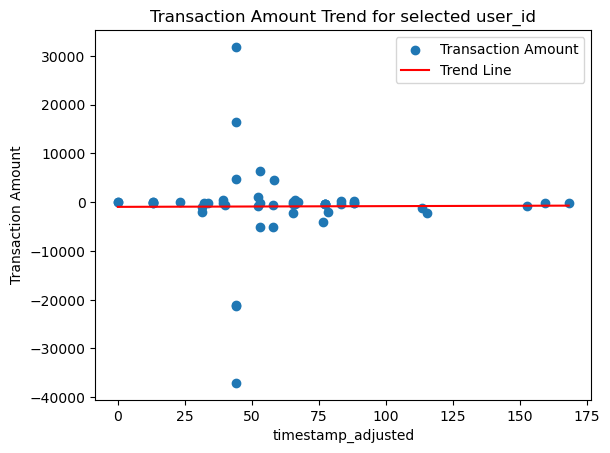

Sin of angle: 0.8308797314004844
Cos of angle: 0.5564520392161924


In [344]:
# Поиск линии тренда лля отлдельного случая
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Выбор данных только для конкретного user_id
user_id_3_data = transactions_2[transactions_2['user_id'] == 100]

# Строительство линейной модели
slope, intercept, _, _, _ = linregress(user_id_3_data['timestamp_adjusted'], user_id_3_data['transaction_amt'])

# Вычисление угла наклона в радианах
angle = np.arctan(slope)

# Вычислите синус и косинус угла наклона
sin_angle = np.sin(angle)
cos_angle = np.cos(angle)

# Строительство графика с точками и линией тренда
plt.scatter(user_id_3_data['timestamp_adjusted'], user_id_3_data['transaction_amt'], label='Transaction Amount')
plt.plot(user_id_3_data['timestamp_adjusted'], slope * user_id_3_data['timestamp_adjusted'] + intercept, color='red', label='Trend Line')
plt.xlabel('timestamp_adjusted')
plt.ylabel('Transaction Amount')
plt.legend()
plt.title('Transaction Amount Trend for selected user_id')
plt.show()

print("Sin of angle:", sin_angle)
print("Cos of angle:", cos_angle)

In [345]:
from scipy.stats import linregress

# Группировка данных по 'user_id' и создание линейной модели для каждого пользователя
trend_info = []
for user_id, group_data in transactions_2.groupby('user_id'):
    # Извлечение данных по 'transaction_amt' и 'timestamp' для данного 'user_id'
    transaction_amt = group_data['transaction_amt'].values
    timestamp = group_data['timestamp_adjusted'].values
    
    # Построение линейной модели
    slope, intercept, _, _, _ = linregress(timestamp, transaction_amt)
    
    # Вычисление угла наклона и добавление его к информации о тренде
    angle = np.arctan(slope)  # Угол в радианах
    trend_info.append({'user_id': user_id, 'slope': slope, 'angle': angle})

# Преобразование информации о тренде в DataFrame
trend_df = pd.DataFrame(trend_info)

# Вычисление синуса и косинуса угла наклона
trend_df['sin_angle'] = np.sin(trend_df['angle'])
trend_df['cos_angle'] = np.cos(trend_df['angle'])

# Вывод результатов
print(trend_df)

       user_id       slope     angle  sin_angle  cos_angle
0            3  851.807241  1.569622   0.999999   0.001174
1            9  -39.437889 -1.545445  -0.999679   0.025348
2           13   20.740954  1.522620   0.998840   0.048158
3           37    5.624834  1.394852   0.984562   0.175038
4           41   53.193212  1.551999   0.999823   0.018796
...        ...         ...       ...        ...        ...
95995   562043   41.237158  1.546551   0.999706   0.024243
95996   562205   -2.362901 -1.170444  -0.920924   0.389743
95997   562312    0.502970  0.466021   0.449335   0.893363
95998   562721  -20.128086 -1.521155  -0.998768   0.049621
95999   562740   -1.460082 -0.970281  -0.825045   0.565068

[96000 rows x 5 columns]


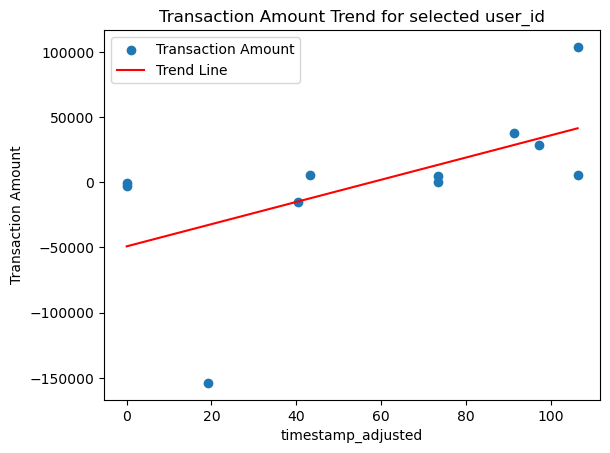

Sin of angle: 0.9999993108926218
Cos of angle: 0.0011739737141143905


In [346]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Выбор данных только для конкретного user_id
user_id_3_data = transactions_2[transactions_2['user_id'] == 3]

# Строительство линейной модели
slope, intercept, _, _, _ = linregress(user_id_3_data['timestamp_adjusted'], user_id_3_data['transaction_amt'])

# Вычисление угла наклона в радианах
angle = np.arctan(slope)

# Вычислите синус и косинус угла наклона
sin_angle = np.sin(angle)
cos_angle = np.cos(angle)

# Строительство графика с точками и линией тренда
plt.scatter(user_id_3_data['timestamp_adjusted'], user_id_3_data['transaction_amt'], label='Transaction Amount')
plt.plot(user_id_3_data['timestamp_adjusted'], slope * user_id_3_data['timestamp_adjusted'] + intercept, color='red', label='Trend Line')
plt.xlabel('timestamp_adjusted')
plt.ylabel('Transaction Amount')
plt.legend()
plt.title('Transaction Amount Trend for selected user_id')
plt.show()

print("Sin of angle:", sin_angle)
print("Cos of angle:", cos_angle)

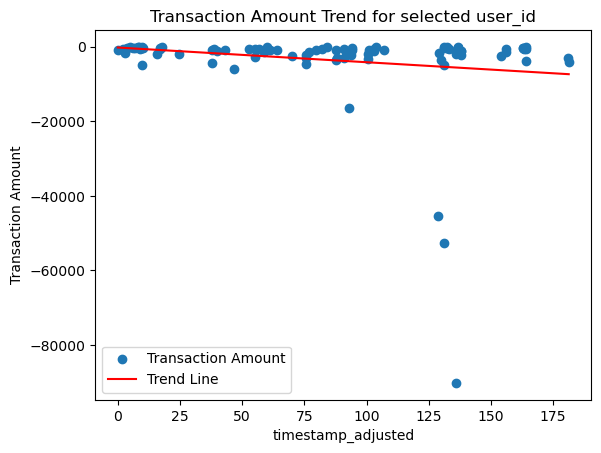

Sin of angle: -0.9996786832784239
Cos of angle: 0.025348179396490537


In [347]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Выбор данных только для конкретного user_id
user_id_3_data = transactions_2[transactions_2['user_id'] == 9]

# Строительство линейной модели
slope, intercept, _, _, _ = linregress(user_id_3_data['timestamp_adjusted'], user_id_3_data['transaction_amt'])

# Вычисление угла наклона в радианах
angle = np.arctan(slope)

# Вычислите синус и косинус угла наклона
sin_angle = np.sin(angle)
cos_angle = np.cos(angle)

# Строительство графика с точками и линией тренда
plt.scatter(user_id_3_data['timestamp_adjusted'], user_id_3_data['transaction_amt'], label='Transaction Amount')
plt.plot(user_id_3_data['timestamp_adjusted'], slope * user_id_3_data['timestamp_adjusted'] + intercept, color='red', label='Trend Line')
plt.xlabel('timestamp_adjusted')
plt.ylabel('Transaction Amount')
plt.legend()
plt.title('Transaction Amount Trend for selected user_id')
plt.show()

print("Sin of angle:", sin_angle)
print("Cos of angle:", cos_angle)

In [348]:
transactions.loc[transactions['user_id'] == 9]

,user_id,mcc_code,currency_rk,transaction_amt,transaction_dttm,timestamp
11,9,13,1,-888.692993,2021-10-20 12:54:01,1634734441
12,9,1,1,-524.299988,2021-10-22 13:52:36,1634910756
13,9,15,1,-1813.861816,2021-10-23 09:02:39,1634979759
14,9,1,1,-327.689056,2021-10-24 09:17:26,1635067046
15,9,4,1,-192.625961,2021-10-25 13:05:25,1635167125
...,...,...,...,...,...,...
96,9,1,1,-234.991287,2022-04-02 12:06:23,1648901183
97,9,1,1,-558.820862,2022-04-02 12:10:48,1648901448
98,9,1,1,-3792.205322,2022-04-02 13:20:16,1648905616
99,9,42,1,-3042.217285,2022-04-19 14:35:53,1650378953


In [349]:
clients_04

,user_id,report,employee_count_nm,bankemplstatus,customer_age,mean_transaction,median_transaction,transaction_count
0,3,2,5.0,0,3,1246.037876,4549.455078,11
1,9,1,8.0,0,3,-3593.718520,-840.509674,90
2,13,6,6.0,0,2,-5668.971780,-10529.004883,22
3,37,5,8.0,0,2,-1053.522538,-236.420776,315
4,41,1,5.0,0,2,-6786.663385,-6328.293701,16
...,...,...,...,...,...,...,...,...
95995,562043,12,NaN,0,2,-799.493409,-239.170517,37
95996,562205,12,NaN,0,1,-268.158335,-147.305283,151
95997,562312,12,NaN,0,0,-331.032523,-271.973526,56
95998,562721,12,NaN,0,2,-1929.467785,-399.343048,85


In [390]:
# главный "сырой" датасет
clients_05 = clients_04
clients_05 = clients_05.merge(trend_df, on='user_id', how='left')
clients_05

,user_id,report,employee_count_nm,bankemplstatus,customer_age,mean_transaction,median_transaction,transaction_count,slope,angle,sin_angle,cos_angle
0,3,2,5.0,0,3,1246.037876,4549.455078,11,851.807241,1.569622,0.999999,0.001174
1,9,1,8.0,0,3,-3593.718520,-840.509674,90,-39.437889,-1.545445,-0.999679,0.025348
2,13,6,6.0,0,2,-5668.971780,-10529.004883,22,20.740954,1.522620,0.998840,0.048158
3,37,5,8.0,0,2,-1053.522538,-236.420776,315,5.624834,1.394852,0.984562,0.175038
4,41,1,5.0,0,2,-6786.663385,-6328.293701,16,53.193212,1.551999,0.999823,0.018796
...,...,...,...,...,...,...,...,...,...,...,...,...
95995,562043,12,NaN,0,2,-799.493409,-239.170517,37,41.237158,1.546551,0.999706,0.024243
95996,562205,12,NaN,0,1,-268.158335,-147.305283,151,-2.362901,-1.170444,-0.920924,0.389743
95997,562312,12,NaN,0,0,-331.032523,-271.973526,56,0.502970,0.466021,0.449335,0.893363
95998,562721,12,NaN,0,2,-1929.467785,-399.343048,85,-20.128086,-1.521155,-0.998768,0.049621


In [391]:
# небольшая нормализация
# Z-преобразование
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_standard = StandardScaler()

clients_05['mean_transaction'] = scaler_standard.fit_transform(clients_05[['mean_transaction']])
clients_05['median_transaction'] = scaler_standard.fit_transform(clients_05[['median_transaction']])
clients_05['transaction_count'] = scaler_standard.fit_transform(clients_05[['transaction_count']])
clients_05['slope'] = scaler_standard.fit_transform(clients_05[['slope']])

clients_05

,user_id,report,employee_count_nm,bankemplstatus,customer_age,mean_transaction,median_transaction,transaction_count,slope,angle,sin_angle,cos_angle
0,3,2,5.0,0,3,0.375676,0.845562,-0.842608,0.532373,1.569622,0.999999,0.001174
1,9,1,8.0,0,3,-0.276127,0.014039,-0.310923,-0.021858,-1.545445,-0.999679,0.025348
2,13,6,6.0,0,2,-0.555616,-1.480630,-0.768576,0.015565,1.522620,0.998840,0.048158
3,37,5,8.0,0,2,0.065978,0.107233,1.203371,0.006165,1.394852,0.984562,0.175038
4,41,1,5.0,0,2,-0.706143,-0.832576,-0.808957,0.035746,1.551999,0.999823,0.018796
...,...,...,...,...,...,...,...,...,...,...,...,...
95995,562043,12,NaN,0,2,0.100190,0.106809,-0.667623,0.028311,1.546551,0.999706,0.024243
95996,562205,12,NaN,0,1,0.171749,0.120981,0.099619,0.001197,-1.170444,-0.920924,0.389743
95997,562312,12,NaN,0,0,0.163281,0.101748,-0.539749,0.002980,0.466021,0.449335,0.893363
95998,562721,12,NaN,0,2,-0.051991,0.082099,-0.344574,-0.009850,-1.521155,-0.998768,0.049621


In [392]:
# заполним пропуски в значениях employee_count_nm
from sklearn.linear_model import LinearRegression

# Создаем подмножество датасета без пропущенных значений в 'employee_count_nm'
subset = clients_05.dropna(subset=['employee_count_nm'])

# Определяем признаки и целевую переменную для обучения модели
features = ['mean_transaction', 'median_transaction', 'transaction_count', 'slope', 'angle', 'sin_angle']
X = subset[features]
y = subset['employee_count_nm']

# Обучаем модель на имеющихся данных
model = LinearRegression()
model.fit(X, y)

# Прогнозируем пропущенные значения
X_missing = clients_05[clients_05['employee_count_nm'].isna()][features]
predicted_values = model.predict(X_missing)

# Заполняем пропущенные значения в 'employee_count_nm' предсказанными значениями
clients_05.loc[clients_05['employee_count_nm'].isna(), 'employee_count_nm'] = predicted_values

# Округление значений в столбце 'employee_count_nm' в сторону большего целого
clients_05['employee_count_nm'] = np.ceil(clients_05['employee_count_nm'])
clients_05['employee_count_nm'] = clients_05['employee_count_nm'].astype(int)

clients_05

,user_id,report,employee_count_nm,bankemplstatus,customer_age,mean_transaction,median_transaction,transaction_count,slope,angle,sin_angle,cos_angle
0,3,2,5,0,3,0.375676,0.845562,-0.842608,0.532373,1.569622,0.999999,0.001174
1,9,1,8,0,3,-0.276127,0.014039,-0.310923,-0.021858,-1.545445,-0.999679,0.025348
2,13,6,6,0,2,-0.555616,-1.480630,-0.768576,0.015565,1.522620,0.998840,0.048158
3,37,5,8,0,2,0.065978,0.107233,1.203371,0.006165,1.394852,0.984562,0.175038
4,41,1,5,0,2,-0.706143,-0.832576,-0.808957,0.035746,1.551999,0.999823,0.018796
...,...,...,...,...,...,...,...,...,...,...,...,...
95995,562043,12,6,0,2,0.100190,0.106809,-0.667623,0.028311,1.546551,0.999706,0.024243
95996,562205,12,6,0,1,0.171749,0.120981,0.099619,0.001197,-1.170444,-0.920924,0.389743
95997,562312,12,6,0,0,0.163281,0.101748,-0.539749,0.002980,0.466021,0.449335,0.893363
95998,562721,12,6,0,2,-0.051991,0.082099,-0.344574,-0.009850,-1.521155,-0.998768,0.049621


In [393]:
clients_05['employee_count_nm'].isna().sum()

0

# Разделение датасета на тренировочный и тестовый

In [394]:
clients_05.columns

Index(['user_id', 'report', 'employee_count_nm', 'bankemplstatus',
       'customer_age', 'mean_transaction', 'median_transaction',
       'transaction_count', 'slope', 'angle', 'sin_angle', 'cos_angle'],
      dtype='object')

In [396]:
a = train['user_id']
a

0             3
1            13
2            37
3            41
4            42
          ...  
63995    561824
63996    562043
63997    562312
63998    562721
63999    562740
Name: user_id, Length: 64000, dtype: int64

In [398]:
train_clients_05 = clients_05[clients_05['user_id'].isin(a)]
train_clients_05

,user_id,report,employee_count_nm,bankemplstatus,customer_age,mean_transaction,median_transaction,transaction_count,slope,angle,sin_angle,cos_angle
0,3,2,5,0,3,0.375676,0.845562,-0.842608,0.532373,1.569622,0.999999,0.001174
2,13,6,6,0,2,-0.555616,-1.480630,-0.768576,0.015565,1.522620,0.998840,0.048158
3,37,5,8,0,2,0.065978,0.107233,1.203371,0.006165,1.394852,0.984562,0.175038
4,41,1,5,0,2,-0.706143,-0.832576,-0.808957,0.035746,1.551999,0.999823,0.018796
5,42,12,1,0,3,0.233953,0.094068,-0.519559,0.010503,1.491605,0.996866,0.079109
...,...,...,...,...,...,...,...,...,...,...,...,...
95992,561824,12,6,0,0,0.139861,0.100483,0.079429,0.003828,1.079216,0.881588,0.472020
95995,562043,12,6,0,2,0.100190,0.106809,-0.667623,0.028311,1.546551,0.999706,0.024243
95997,562312,12,6,0,0,0.163281,0.101748,-0.539749,0.002980,0.466021,0.449335,0.893363
95998,562721,12,6,0,2,-0.051991,0.082099,-0.344574,-0.009850,-1.521155,-0.998768,0.049621


In [423]:
train_marks = pd.merge(train_clients_05, train, on='user_id', how='inner')
train_marks

,user_id,report,employee_count_nm,bankemplstatus,customer_age,mean_transaction,median_transaction,transaction_count,slope,angle,sin_angle,cos_angle,target,time
0,3,2,5,0,3,0.375676,0.845562,-0.842608,0.532373,1.569622,0.999999,0.001174,0,77
1,13,6,6,0,2,-0.555616,-1.480630,-0.768576,0.015565,1.522620,0.998840,0.048158,0,86
2,37,5,8,0,2,0.065978,0.107233,1.203371,0.006165,1.394852,0.984562,0.175038,0,89
3,41,1,5,0,2,-0.706143,-0.832576,-0.808957,0.035746,1.551999,0.999823,0.018796,0,57
4,42,12,1,0,3,0.233953,0.094068,-0.519559,0.010503,1.491605,0.996866,0.079109,0,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63995,561824,12,6,0,0,0.139861,0.100483,0.079429,0.003828,1.079216,0.881588,0.472020,0,91
63996,562043,12,6,0,2,0.100190,0.106809,-0.667623,0.028311,1.546551,0.999706,0.024243,0,75
63997,562312,12,6,0,0,0.163281,0.101748,-0.539749,0.002980,0.466021,0.449335,0.893363,0,91
63998,562721,12,6,0,2,-0.051991,0.082099,-0.344574,-0.009850,-1.521155,-0.998768,0.049621,0,29


In [424]:
train_marks = train_marks.drop(['report', 'bankemplstatus', 'time'], axis=1)
train_marks

,user_id,employee_count_nm,customer_age,mean_transaction,median_transaction,transaction_count,slope,angle,sin_angle,cos_angle,target
0,3,5,3,0.375676,0.845562,-0.842608,0.532373,1.569622,0.999999,0.001174,0
1,13,6,2,-0.555616,-1.480630,-0.768576,0.015565,1.522620,0.998840,0.048158,0
2,37,8,2,0.065978,0.107233,1.203371,0.006165,1.394852,0.984562,0.175038,0
3,41,5,2,-0.706143,-0.832576,-0.808957,0.035746,1.551999,0.999823,0.018796,0
4,42,1,3,0.233953,0.094068,-0.519559,0.010503,1.491605,0.996866,0.079109,0
...,...,...,...,...,...,...,...,...,...,...,...
63995,561824,6,0,0.139861,0.100483,0.079429,0.003828,1.079216,0.881588,0.472020,0
63996,562043,6,2,0.100190,0.106809,-0.667623,0.028311,1.546551,0.999706,0.024243,0
63997,562312,6,0,0.163281,0.101748,-0.539749,0.002980,0.466021,0.449335,0.893363,0
63998,562721,6,2,-0.051991,0.082099,-0.344574,-0.009850,-1.521155,-0.998768,0.049621,0


In [425]:
test_clients_05 = clients_05[~clients_05['user_id'].isin(train['user_id'])]
test_clients_05 = test_clients_05.drop(['report', 'bankemplstatus'], axis=1)
test_clients_05

,user_id,employee_count_nm,customer_age,mean_transaction,median_transaction,transaction_count,slope,angle,sin_angle,cos_angle
1,9,8,3,-0.276127,0.014039,-0.310923,-0.021858,-1.545445,-0.999679,0.025348
9,61,6,3,0.273781,0.081484,-0.465717,-0.009630,-1.520267,-0.998724,0.050508
10,62,1,1,0.758423,0.129366,-0.835878,-0.094946,-1.564426,-0.999980,0.006371
17,80,8,1,0.027153,0.026673,1.957153,0.005950,1.383587,0.982528,0.186117
20,88,6,2,0.073269,0.097252,-0.580130,0.003441,0.893979,0.779570,0.626315
...,...,...,...,...,...,...,...,...,...,...
95988,561362,6,3,0.110930,0.071552,-0.250351,0.004515,1.246248,0.947795,0.318881
95990,561419,6,3,0.201326,0.070452,-0.432066,-0.013230,-1.531699,-0.999236,0.039088
95993,561895,6,2,-2.270221,-0.075788,-0.654163,0.107566,1.564868,0.999982,0.005928
95994,561908,6,2,2.079520,0.109154,-0.539749,-0.173976,-1.567276,-0.999994,0.003520


# Обучение модели

In [428]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X_train = train_marks.drop(columns=['target'])
y_train = train_marks['target']

# Обработка категориальных признаков
categorical_features = ['employee_count_nm', 'customer_age']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Объединение преобразованных признаков
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])

# Определение и обучение модели случайного леса
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('rf', RandomForestRegressor())])

model.fit(X_train, y_train)

# Предсказание шанса на отток в тестовых данных
predict = model.predict(test_clients_05)
test_clients_05['predict'] = predict

In [429]:
test_clients_05

,user_id,employee_count_nm,customer_age,mean_transaction,median_transaction,transaction_count,slope,angle,sin_angle,cos_angle,predict
1,9,8,3,-0.276127,0.014039,-0.310923,-0.021858,-1.545445,-0.999679,0.025348,0.041952
9,61,6,3,0.273781,0.081484,-0.465717,-0.009630,-1.520267,-0.998724,0.050508,0.079750
10,62,1,1,0.758423,0.129366,-0.835878,-0.094946,-1.564426,-0.999980,0.006371,0.065077
17,80,8,1,0.027153,0.026673,1.957153,0.005950,1.383587,0.982528,0.186117,0.029108
20,88,6,2,0.073269,0.097252,-0.580130,0.003441,0.893979,0.779570,0.626315,0.079791
...,...,...,...,...,...,...,...,...,...,...,...
95988,561362,6,3,0.110930,0.071552,-0.250351,0.004515,1.246248,0.947795,0.318881,0.079750
95990,561419,6,3,0.201326,0.070452,-0.432066,-0.013230,-1.531699,-0.999236,0.039088,0.079750
95993,561895,6,2,-2.270221,-0.075788,-0.654163,0.107566,1.564868,0.999982,0.005928,0.079791
95994,561908,6,2,2.079520,0.109154,-0.539749,-0.173976,-1.567276,-0.999994,0.003520,0.079791


In [427]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

test_clients_05 = clients_05[~clients_05['user_id'].isin(train['user_id'])]
test_clients_05 = test_clients_05.drop(['report', 'bankemplstatus'], axis=1)

# Разделение данных на признаки и целевую переменную
X = train_marks.drop('target', axis=1)
y = train_marks['target']

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Применение One-Hot Encoding к категориальным признакам
cat_columns = ['employee_count_nm', 'customer_age']
X_train_encoded = pd.get_dummies(X_train, columns=cat_columns)
X_test_encoded = pd.get_dummies(X_test, columns=cat_columns)
test_clients_05_encoded = pd.get_dummies(test_clients_05, columns=cat_columns)

# Обучение модели случайного леса
model = RandomForestClassifier(n_estimators=100, random_state=42)
cv_scores = cross_val_score(model, X_train_encoded, y_train, cv=5)

print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

# Оценка качества модели на тестовом наборе
model.fit(X_train_encoded, y_train)
y_pred = model.predict(X_test_encoded)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Test Set:", accuracy)

# Применение обученной модели к тестовым данным и получение предсказаний
test_predictions = model.predict(test_clients_05_encoded.drop('client_id', axis=1))

# Добавление предсказаний в тестовые данные
test_clients_05['churn_probability'] = test_predictions
test_clients_05

Cross-Validation Scores: [0.91679687 0.91972656 0.91728516 0.91894531 0.91835937]
Mean CV Score: 0.9182226562499999


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- employee_count_nm_38
Feature names seen at fit time, yet now missing:
- employee_count_nm_0


In [430]:
test_clients_05.columns

Index(['user_id', 'employee_count_nm', 'customer_age', 'mean_transaction',
       'median_transaction', 'transaction_count', 'slope', 'angle',
       'sin_angle', 'cos_angle', 'predict'],
      dtype='object')

In [431]:
df = test_clients_05[['user_id', 'predict']]

In [432]:
df

,user_id,predict
1,9,0.041952
9,61,0.079750
10,62,0.065077
17,80,0.029108
20,88,0.079791
...,...,...
95988,561362,0.079750
95990,561419,0.079750
95993,561895,0.079791
95994,561908,0.079791


In [433]:
df.to_csv('Misyurin_VA.csv', index=False)

In [435]:
import os

# Получение пути к рабочему столу
desktop_path = os.path.join(os.path.join(os.environ['USERPROFILE']), 'Desktop')

# Сохранение файла на рабочий стол
df.to_csv(os.path.join(desktop_path, 'Misyurin_VA.csv'), index=False)


In [ ]:
# Согласно результатам проверки качество модели составляет 0,6583718075

# Попытки улучшения модели

In [463]:
train_marks = pd.merge(train_clients_05, train, on='user_id', how='inner')
train_marks

,user_id,report,employee_count_nm,bankemplstatus,customer_age,mean_transaction,median_transaction,transaction_count,slope,angle,sin_angle,cos_angle,target,time
0,3,2,5,0,3,0.375676,0.845562,-0.842608,0.532373,1.569622,0.999999,0.001174,0,77
1,13,6,6,0,2,-0.555616,-1.480630,-0.768576,0.015565,1.522620,0.998840,0.048158,0,86
2,37,5,8,0,2,0.065978,0.107233,1.203371,0.006165,1.394852,0.984562,0.175038,0,89
3,41,1,5,0,2,-0.706143,-0.832576,-0.808957,0.035746,1.551999,0.999823,0.018796,0,57
4,42,12,1,0,3,0.233953,0.094068,-0.519559,0.010503,1.491605,0.996866,0.079109,0,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63995,561824,12,6,0,0,0.139861,0.100483,0.079429,0.003828,1.079216,0.881588,0.472020,0,91
63996,562043,12,6,0,2,0.100190,0.106809,-0.667623,0.028311,1.546551,0.999706,0.024243,0,75
63997,562312,12,6,0,0,0.163281,0.101748,-0.539749,0.002980,0.466021,0.449335,0.893363,0,91
63998,562721,12,6,0,2,-0.051991,0.082099,-0.344574,-0.009850,-1.521155,-0.998768,0.049621,0,29


In [464]:
test_clients_05 = clients_05[~clients_05['user_id'].isin(train['user_id'])]
test_clients_05 = test_clients_05.drop(['report', 'bankemplstatus'], axis=1)
test_clients_05

,user_id,employee_count_nm,customer_age,mean_transaction,median_transaction,transaction_count,slope,angle,sin_angle,cos_angle
1,9,8,3,-0.276127,0.014039,-0.310923,-0.021858,-1.545445,-0.999679,0.025348
9,61,6,3,0.273781,0.081484,-0.465717,-0.009630,-1.520267,-0.998724,0.050508
10,62,1,1,0.758423,0.129366,-0.835878,-0.094946,-1.564426,-0.999980,0.006371
17,80,8,1,0.027153,0.026673,1.957153,0.005950,1.383587,0.982528,0.186117
20,88,6,2,0.073269,0.097252,-0.580130,0.003441,0.893979,0.779570,0.626315
...,...,...,...,...,...,...,...,...,...,...
95988,561362,6,3,0.110930,0.071552,-0.250351,0.004515,1.246248,0.947795,0.318881
95990,561419,6,3,0.201326,0.070452,-0.432066,-0.013230,-1.531699,-0.999236,0.039088
95993,561895,6,2,-2.270221,-0.075788,-0.654163,0.107566,1.564868,0.999982,0.005928
95994,561908,6,2,2.079520,0.109154,-0.539749,-0.173976,-1.567276,-0.999994,0.003520


In [465]:
train_marks_bankemp_drop = train_marks[train_marks['bankemplstatus'] != 1]
train_marks_bankemp_drop

,user_id,report,employee_count_nm,bankemplstatus,customer_age,mean_transaction,median_transaction,transaction_count,slope,angle,sin_angle,cos_angle,target,time
0,3,2,5,0,3,0.375676,0.845562,-0.842608,0.532373,1.569622,0.999999,0.001174,0,77
1,13,6,6,0,2,-0.555616,-1.480630,-0.768576,0.015565,1.522620,0.998840,0.048158,0,86
2,37,5,8,0,2,0.065978,0.107233,1.203371,0.006165,1.394852,0.984562,0.175038,0,89
3,41,1,5,0,2,-0.706143,-0.832576,-0.808957,0.035746,1.551999,0.999823,0.018796,0,57
4,42,12,1,0,3,0.233953,0.094068,-0.519559,0.010503,1.491605,0.996866,0.079109,0,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63995,561824,12,6,0,0,0.139861,0.100483,0.079429,0.003828,1.079216,0.881588,0.472020,0,91
63996,562043,12,6,0,2,0.100190,0.106809,-0.667623,0.028311,1.546551,0.999706,0.024243,0,75
63997,562312,12,6,0,0,0.163281,0.101748,-0.539749,0.002980,0.466021,0.449335,0.893363,0,91
63998,562721,12,6,0,2,-0.051991,0.082099,-0.344574,-0.009850,-1.521155,-0.998768,0.049621,0,29


In [466]:
train_marks_bankemp_drop = train_marks_bankemp_drop.drop(['bankemplstatus'], axis=1)
train_marks_bankemp_drop.head()

,user_id,report,employee_count_nm,customer_age,mean_transaction,median_transaction,transaction_count,slope,angle,sin_angle,cos_angle,target,time
0,3,2,5,3,0.375676,0.845562,-0.842608,0.532373,1.569622,0.999999,0.001174,0,77
1,13,6,6,2,-0.555616,-1.480630,-0.768576,0.015565,1.522620,0.998840,0.048158,0,86
2,37,5,8,2,0.065978,0.107233,1.203371,0.006165,1.394852,0.984562,0.175038,0,89
3,41,1,5,2,-0.706143,-0.832576,-0.808957,0.035746,1.551999,0.999823,0.018796,0,57
4,42,12,1,3,0.233953,0.094068,-0.519559,0.010503,1.491605,0.996866,0.079109,0,84


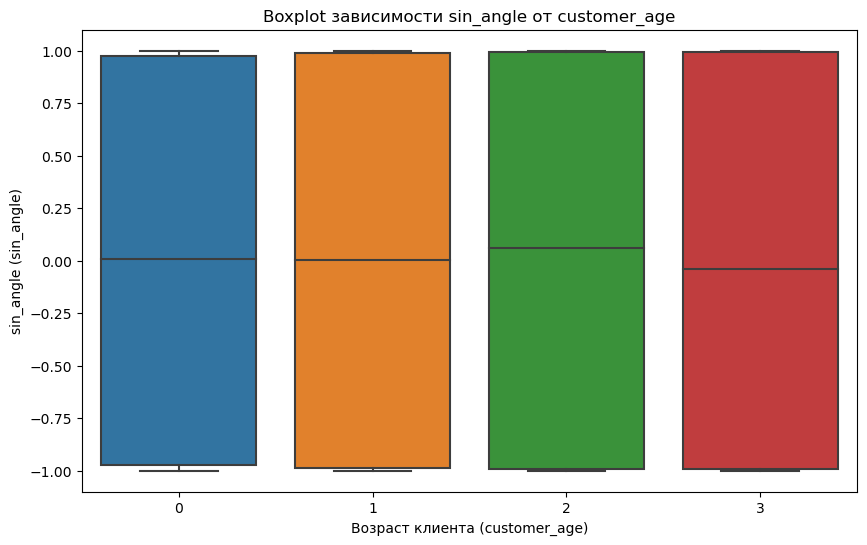

In [441]:
# Посмотрим некоторые зависимости

import seaborn as sns

# Переменные и названия столбцов для осей и графика
x_variable = 'customer_age'
y_variable = 'sin_angle'
x_label = f'Возраст клиента ({x_variable})'
y_label = f'sin_angle ({y_variable})'

# Построение boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=x_variable, y=y_variable, data=train_marks_bankemp_drop)
plt.title(f'Boxplot зависимости {y_variable} от {x_variable}')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.show()

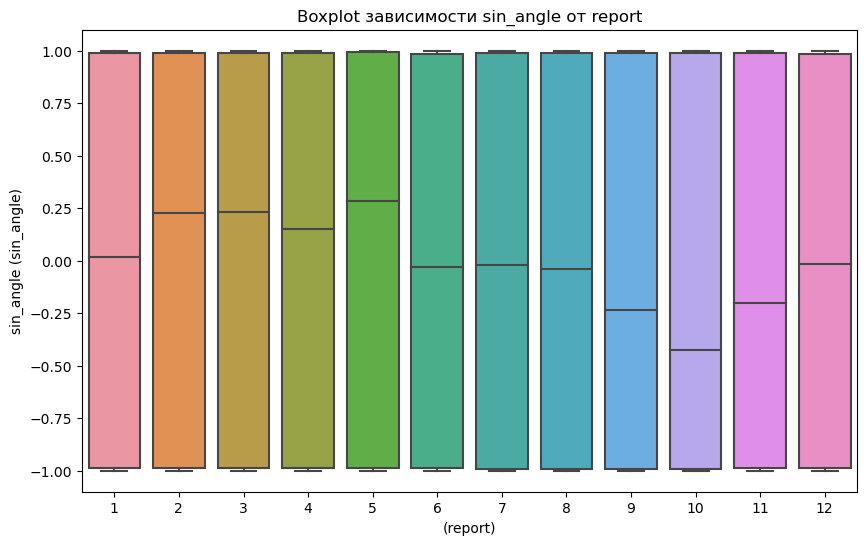

In [442]:
# Названия столбцов для осей и графика
x_variable = 'report'
y_variable = 'sin_angle'
x_label = f'({x_variable})'
y_label = f'sin_angle ({y_variable})'

# Построение boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=x_variable, y=y_variable, data=train_marks_bankemp_drop)
plt.title(f'Boxplot зависимости {y_variable} от {x_variable}')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.show()

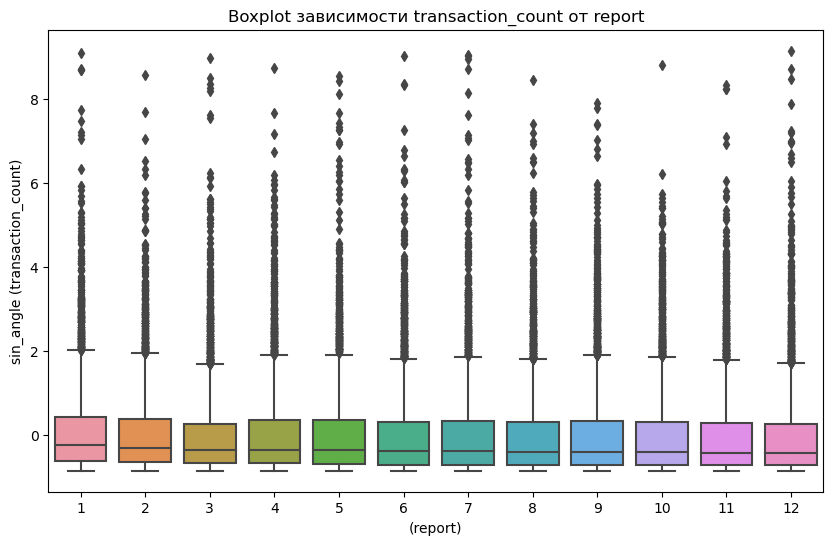

In [443]:
# Названия столбцов для осей и графика
x_variable = 'report'
y_variable = 'transaction_count'
x_label = f'({x_variable})'
y_label = f'sin_angle ({y_variable})'

# Построение boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=x_variable, y=y_variable, data=train_marks_bankemp_drop)
plt.title(f'Boxplot зависимости {y_variable} от {x_variable}')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.show()

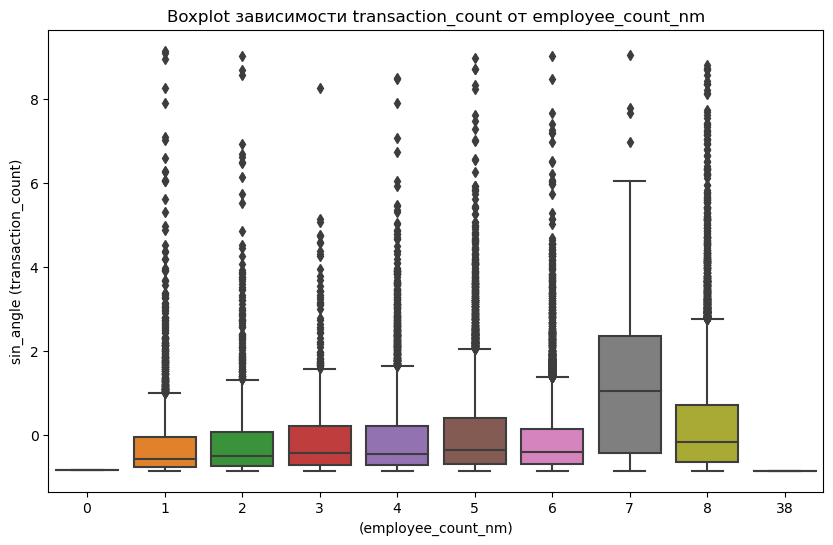

In [445]:
# Названия столбцов для осей и графика
x_variable = 'employee_count_nm'
y_variable = 'transaction_count'
x_label = f'({x_variable})'
y_label = f'sin_angle ({y_variable})'

# Построение boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=x_variable, y=y_variable, data=train_marks_bankemp_drop)
plt.title(f'Boxplot зависимости {y_variable} от {x_variable}')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.show()

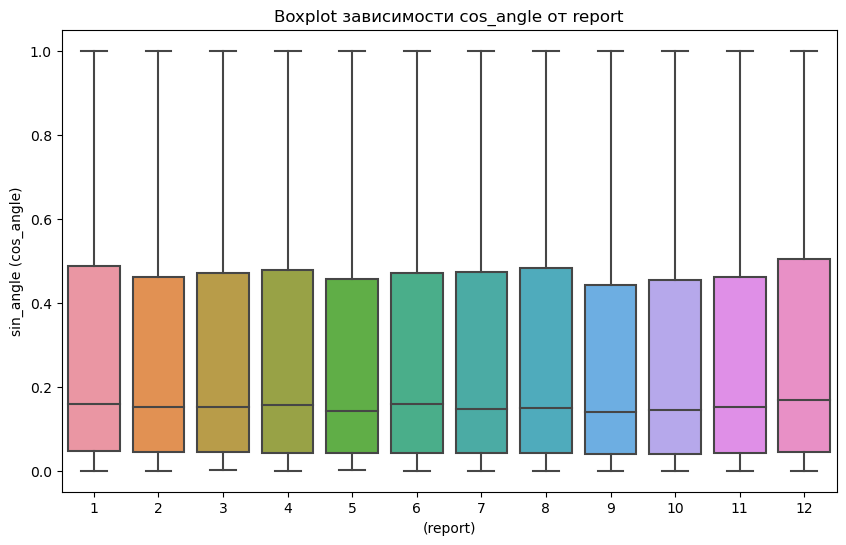

In [446]:
# Названия столбцов для осей и графика
x_variable = 'report'
y_variable = 'cos_angle'
x_label = f'({x_variable})'
y_label = f'sin_angle ({y_variable})'

# Построение boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=x_variable, y=y_variable, data=train_marks_bankemp_drop)
plt.title(f'Boxplot зависимости {y_variable} от {x_variable}')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.show()

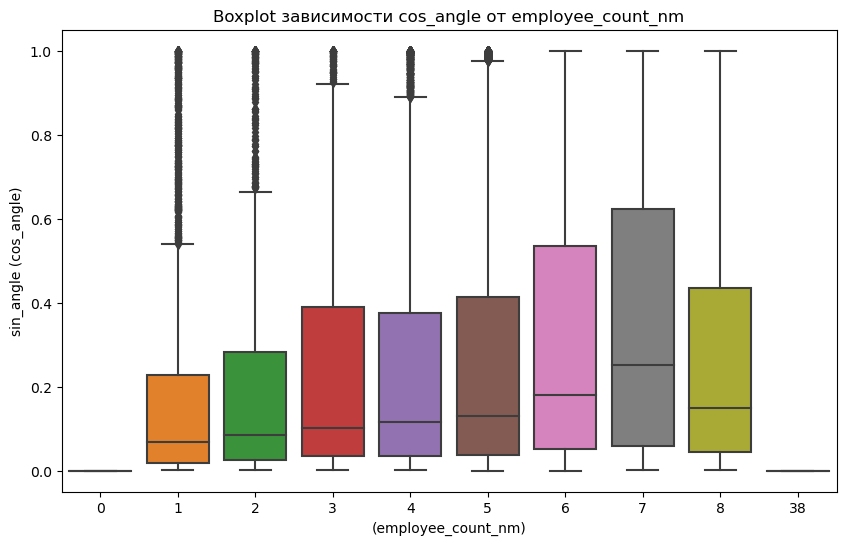

In [447]:
# Названия столбцов для осей и графика
x_variable = 'employee_count_nm'
y_variable = 'cos_angle'
x_label = f'({x_variable})'
y_label = f'sin_angle ({y_variable})'

# Построение boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=x_variable, y=y_variable, data=train_marks_bankemp_drop)
plt.title(f'Boxplot зависимости {y_variable} от {x_variable}')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.show()

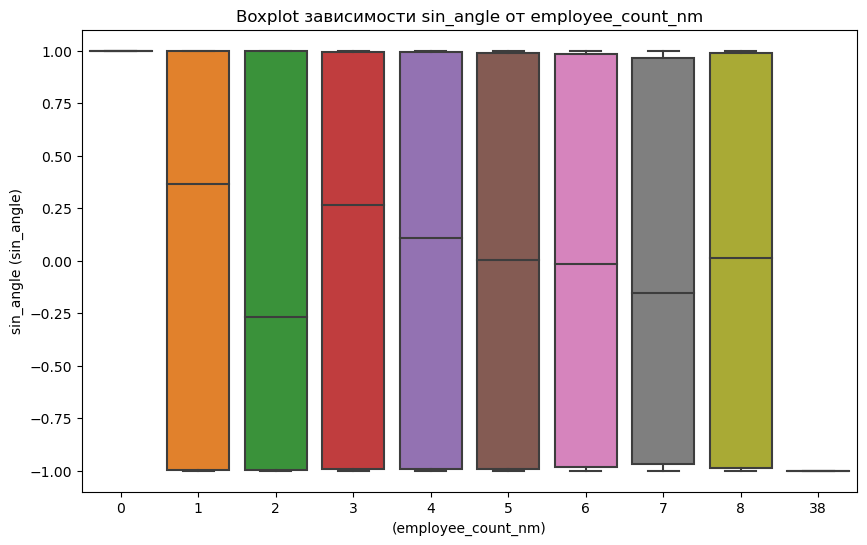

In [448]:
# Названия столбцов для осей и графика
x_variable = 'employee_count_nm'
y_variable = 'sin_angle'
x_label = f'({x_variable})'
y_label = f'sin_angle ({y_variable})'

# Построение boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=x_variable, y=y_variable, data=train_marks_bankemp_drop)
plt.title(f'Boxplot зависимости {y_variable} от {x_variable}')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.show()

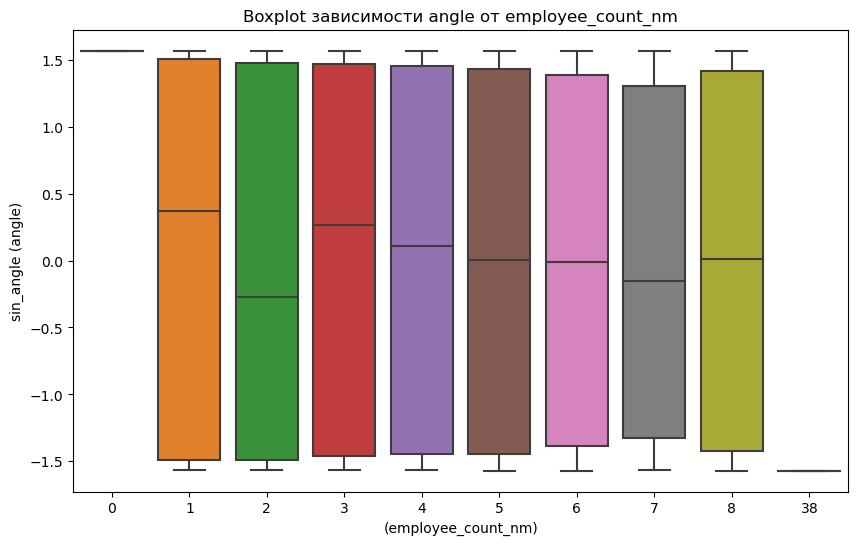

In [449]:
# Названия столбцов для осей и графика
x_variable = 'employee_count_nm'
y_variable = 'angle'
x_label = f'({x_variable})'
y_label = f'sin_angle ({y_variable})'

# Построение boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=x_variable, y=y_variable, data=train_marks_bankemp_drop)
plt.title(f'Boxplot зависимости {y_variable} от {x_variable}')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.show()

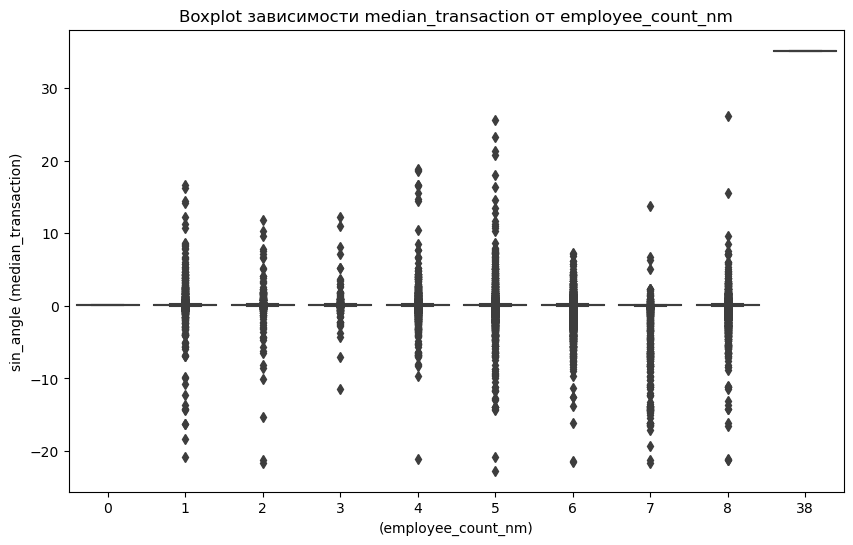

In [450]:
# Названия столбцов для осей и графика
x_variable = 'employee_count_nm'
y_variable = 'median_transaction'
x_label = f'({x_variable})'
y_label = f'sin_angle ({y_variable})'

# Построение boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=x_variable, y=y_variable, data=train_marks_bankemp_drop)
plt.title(f'Boxplot зависимости {y_variable} от {x_variable}')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.show()

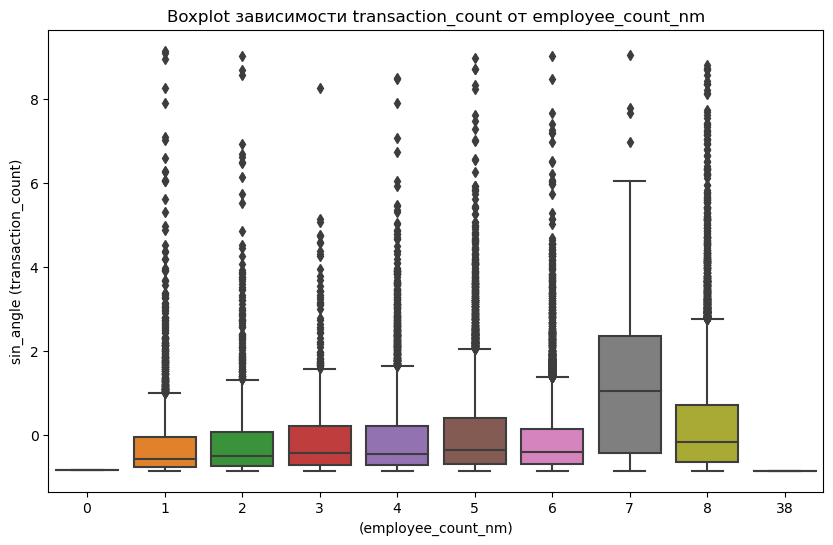

In [451]:
# Названия столбцов для осей и графика
x_variable = 'employee_count_nm'
y_variable = 'transaction_count'
x_label = f'({x_variable})'
y_label = f'sin_angle ({y_variable})'

# Построение boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=x_variable, y=y_variable, data=train_marks_bankemp_drop)
plt.title(f'Boxplot зависимости {y_variable} от {x_variable}')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.show()

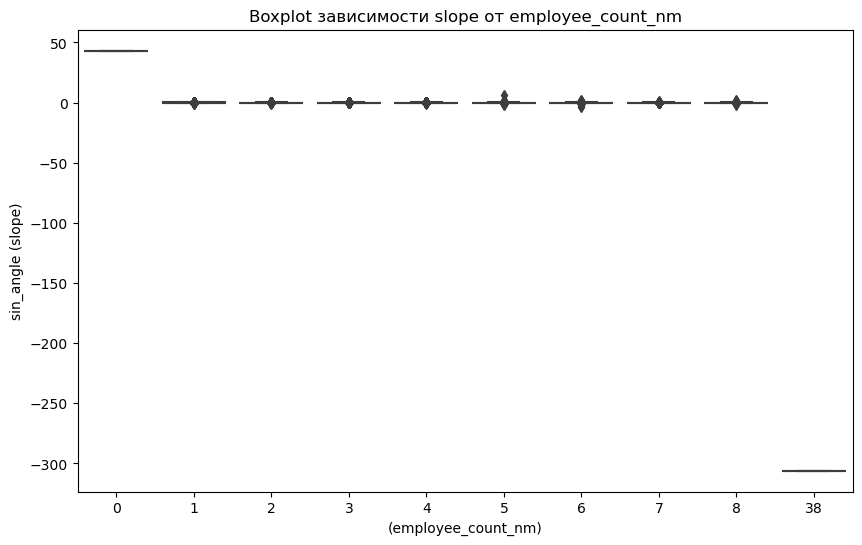

In [452]:
# Названия столбцов для осей и графика
x_variable = 'employee_count_nm'
y_variable = 'slope'
x_label = f'({x_variable})'
y_label = f'sin_angle ({y_variable})'

# Построение boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=x_variable, y=y_variable, data=train_marks_bankemp_drop)
plt.title(f'Boxplot зависимости {y_variable} от {x_variable}')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.show()

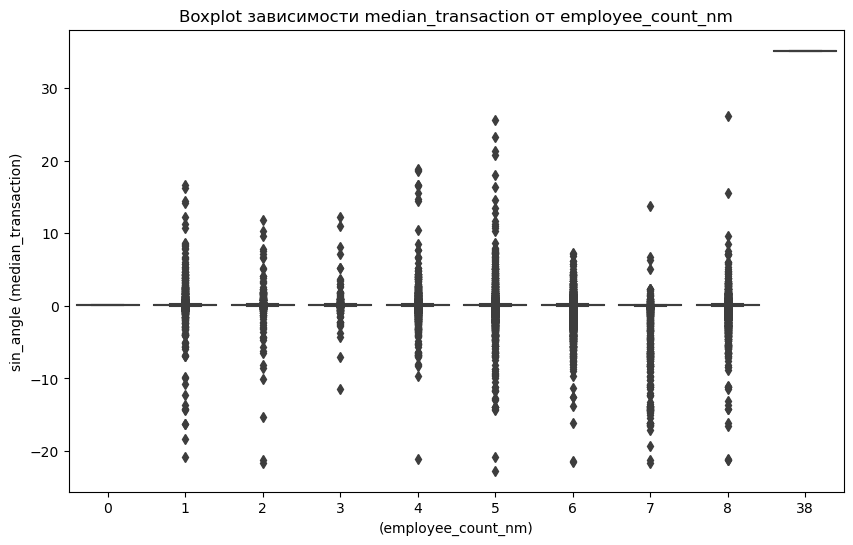

In [458]:
# Названия столбцов для осей и графика
x_variable = 'employee_count_nm'
y_variable = 'median_transaction'
x_label = f'({x_variable})'
y_label = f'sin_angle ({y_variable})'

# Построение boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=x_variable, y=y_variable, data=train_marks_bankemp_drop)
plt.title(f'Boxplot зависимости {y_variable} от {x_variable}')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.show()

In [ ]:
# Исключаем отчёт, синус угла, сам угол, slope, median_transaction, 

In [467]:
train_marks_bankemp_drop.head()

,user_id,report,employee_count_nm,customer_age,mean_transaction,median_transaction,transaction_count,slope,angle,sin_angle,cos_angle,target,time
0,3,2,5,3,0.375676,0.845562,-0.842608,0.532373,1.569622,0.999999,0.001174,0,77
1,13,6,6,2,-0.555616,-1.480630,-0.768576,0.015565,1.522620,0.998840,0.048158,0,86
2,37,5,8,2,0.065978,0.107233,1.203371,0.006165,1.394852,0.984562,0.175038,0,89
3,41,1,5,2,-0.706143,-0.832576,-0.808957,0.035746,1.551999,0.999823,0.018796,0,57
4,42,12,1,3,0.233953,0.094068,-0.519559,0.010503,1.491605,0.996866,0.079109,0,84


In [468]:
test_clients_05.head()

,user_id,employee_count_nm,customer_age,mean_transaction,median_transaction,transaction_count,slope,angle,sin_angle,cos_angle
1,9,8,3,-0.276127,0.014039,-0.310923,-0.021858,-1.545445,-0.999679,0.025348
9,61,6,3,0.273781,0.081484,-0.465717,-0.009630,-1.520267,-0.998724,0.050508
10,62,1,1,0.758423,0.129366,-0.835878,-0.094946,-1.564426,-0.999980,0.006371
17,80,8,1,0.027153,0.026673,1.957153,0.005950,1.383587,0.982528,0.186117
20,88,6,2,0.073269,0.097252,-0.580130,0.003441,0.893979,0.779570,0.626315


In [469]:
train_marks_bankemp_model_2 = train_marks_bankemp_drop.drop(['report', 'mean_transaction', 'slope', 'angle', 'sin_angle', 'time'], axis=1)
train_marks_bankemp_model_2.head()

,user_id,employee_count_nm,customer_age,median_transaction,transaction_count,cos_angle,target
0,3,5,3,0.845562,-0.842608,0.001174,0
1,13,6,2,-1.480630,-0.768576,0.048158,0
2,37,8,2,0.107233,1.203371,0.175038,0
3,41,5,2,-0.832576,-0.808957,0.018796,0
4,42,1,3,0.094068,-0.519559,0.079109,0


In [470]:
test_clients_05_model_2 = test_clients_05.drop(['mean_transaction', 'slope', 'angle', 'sin_angle'], axis=1)
test_clients_05_model_2

,user_id,employee_count_nm,customer_age,median_transaction,transaction_count,cos_angle
1,9,8,3,0.014039,-0.310923,0.025348
9,61,6,3,0.081484,-0.465717,0.050508
10,62,1,1,0.129366,-0.835878,0.006371
17,80,8,1,0.026673,1.957153,0.186117
20,88,6,2,0.097252,-0.580130,0.626315
...,...,...,...,...,...,...
95988,561362,6,3,0.071552,-0.250351,0.318881
95990,561419,6,3,0.070452,-0.432066,0.039088
95993,561895,6,2,-0.075788,-0.654163,0.005928
95994,561908,6,2,0.109154,-0.539749,0.003520


In [473]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X_train = train_marks_bankemp_model_2.drop(columns=['target'])
y_train = train_marks_bankemp_model_2['target']

# Обработка категориальных признаков
categorical_features = ['employee_count_nm', 'customer_age']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Объединение преобразованных признаков
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])

# Определение и обучение модели случайного леса
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('rf', RandomForestRegressor())])

model.fit(X_train, y_train)

# Предсказание шанса на отток в тестовых данных
predict = model.predict(test_clients_05_model_2)
test_clients_05_model_2['predict'] = predict

In [474]:
test_clients_05_model_2

,user_id,employee_count_nm,customer_age,median_transaction,transaction_count,cos_angle,predict
1,9,8,3,0.014039,-0.310923,0.025348,0.041606
9,61,6,3,0.081484,-0.465717,0.050508,0.079947
10,62,1,1,0.129366,-0.835878,0.006371,0.063353
17,80,8,1,0.026673,1.957153,0.186117,0.029471
20,88,6,2,0.097252,-0.580130,0.626315,0.079643
...,...,...,...,...,...,...,...
95988,561362,6,3,0.071552,-0.250351,0.318881,0.079947
95990,561419,6,3,0.070452,-0.432066,0.039088,0.079947
95993,561895,6,2,-0.075788,-0.654163,0.005928,0.079643
95994,561908,6,2,0.109154,-0.539749,0.003520,0.079643


In [475]:
df = test_clients_05_model_2[['user_id', 'predict']]
df

,user_id,predict
1,9,0.041606
9,61,0.079947
10,62,0.063353
17,80,0.029471
20,88,0.079643
...,...,...
95988,561362,0.079947
95990,561419,0.079947
95993,561895,0.079643
95994,561908,0.079643


In [477]:
# Получение пути к рабочему столу
desktop_path = os.path.join(os.path.join(os.environ['USERPROFILE']), 'Desktop')

# Сохранение файла на рабочий стол
df.to_csv(os.path.join(desktop_path, 'Misyurin_VA.csv'), index=False)

In [ ]:
# Конкурс закончился, второе решение не успел отправить и проверить.